In [3]:
# Importing Libraries 
import pandas as pd
import ast
from datasets import load_dataset 
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset ( 'lukebarousse/data_jobs')
df = dataset ['train'].to_pandas ()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime (df ['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_da_us = df[(df['job_title_short'] == "Data Analyst") & (df['job_country']== 'United States')].copy()

Text(0, 0.5, 'Number of jobs')

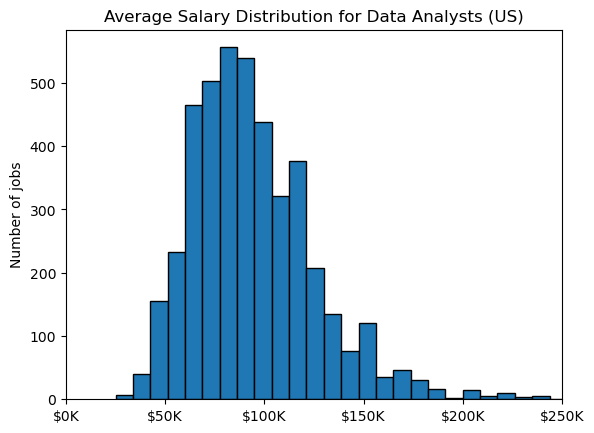

In [22]:
df_da_us['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title('Average Salary Distribution for Data Analysts (US)')
plt.ylabel('Number of jobs')